<a href="https://colab.research.google.com/github/PriyankaMath/Netfix-Data-Cleaning-EDA/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data Cleaning & EDA**

## Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np

import missingno

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS

!pip install pycountry
import pycountry 

## Loading the dataset from GitHub

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PriyankaMath/Netfix-Data-Cleaning-EDA/main/dataset/netflix_titles.csv')
df1=df.copy()

## **Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s158,Movie,While We're Young,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## **Data cleaning**

Checking duplicates in show_id column:

In [5]:

show_id_dupl=len(df['show_id'])!=len(set(df['show_id']))
show_id_dupl

False

Checking for missing values:

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Calculating missing data:

In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


Plotting Column wise missing values:

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

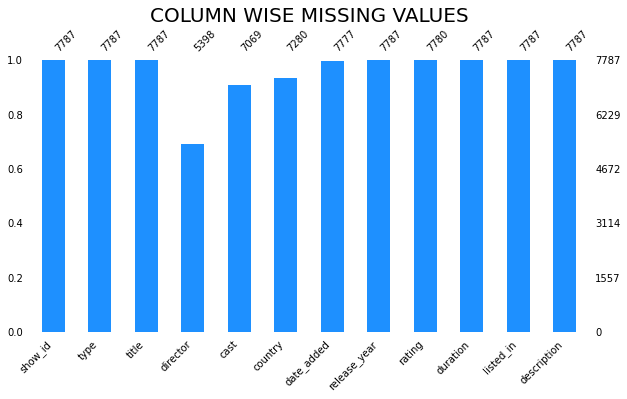

In [8]:
missingno.bar(df,fontsize=10,color="dodgerblue",figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

### **Handling missing values:**
There are missing values in column director, cast, country, date_added and rating.

We can't randomly fill the missing values in columns of director and cast, so we can drop them.

For minimal number of missing values in country and date_added & rating, we can fill them using mode(most common value).

In [9]:
df = df.dropna( how='any',subset=['cast', 'director'])


In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [11]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [12]:
df.duplicated().sum()

0

dataset has 0 duplicated values.

### **Renaming the 'listed_in' column as 'Genre' for easy understanding**

In [13]:
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'].head()

1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
5      International TV Shows, TV Dramas, TV Mysteries
Name: Genre, dtype: object

### **Adding some new columns:**

Year Added & Month Added

In [14]:
df['date_added'].head()

1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
5         July 1, 2017
Name: date_added, dtype: object

In [15]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_added, dtype: object

Converting date_added Column to proper datetime format:

In [16]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['date_added'].head()

1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01
5   2017-07-01
Name: date_added, dtype: datetime64[ns]

In [17]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_added, dtype: int64

### **Separating "season" information into a new column from "duration" column:**


In [18]:
df["season"]=""
df["season"] = df[df["duration"].str.contains("Season")]["duration"]

Making "season" column an Integer:

In [19]:
df["season"]=df["season"].fillna("0")
df["season"]=df["season"].str.replace("Season", "").str.replace("s", "") #Removing "season" string from the "season" column
df["season"]=df["season"].astype(str).astype(int)

Making "duration" column an Integer:

In [20]:
df["duration"]=df.duration.str.replace('^(\d+)(.Seasons*)$', "0") #Removing "season" string from the "duration" column
df["duration"]=df["duration"].str.replace(" min", "") ## Remove "min" string from "duration" column
df["duration"]=df["duration"].astype(int) ## Converting duration into Integer


### **Renaming the 'country' column as 'countries' for easy understanding**

Some of the entries under 'country' column have list of countries with comma separated.

In [21]:
df = df.rename(columns={"country":"countries"})
df["countries"]
#df

1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
5                                                  Turkey
                              ...                        
7778                                        United States
7780                                                India
7781                                        United States
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
Name: countries, Length: 4979, dtype: object

In [22]:
df

,show_id,type,title,director,cast,countries,date_added,release_year,rating,duration,Genre,description,month_added,year_added,season
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,July,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019,0
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,July,2018,0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020,0
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020,0


## **Exploratory Data Analysis and Data Visualization**

### **Analysis of Content Type on Netflix:**

In [23]:
content_type_pie = px.pie(df, names='type', height=300, width=600, 
                          title='Movies vs TV Shows',
                          color_discrete_sequence=['#b20710', '#221f1f'])
content_type_pie.update_layout(margin=dict(t=60, b=30, l=0, r=0),
                      paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93'),
                      font=dict(size=17, color='#8a8d93'))
content_type_pie.show()

### **Content added over the years:**

In [24]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#000000")) 
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))

data = [trace1, trace2]

layout = go.Layout(title="Content added over the years",title_font=dict(size=25), legend=dict( orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### **Top Genres**

In [25]:
genres_df=df[['Genre','type']]
genres_df.dropna(subset=['Genre'], inplace=True)
genres_df

,Genre,type
1,"Dramas, International Movies",Movie
2,"Horror Movies, International Movies",Movie
3,"Action & Adventure, Independent Movies, Sci-Fi...",Movie
4,Dramas,Movie
5,"International TV Shows, TV Dramas, TV Mysteries",TV Show
...,...,...
7778,"Comedies, Horror Movies",Movie
7780,"Dramas, Independent Movies, International Movies",Movie
7781,"Children & Family Movies, Comedies",Movie
7782,"Dramas, International Movies",Movie


Splitting the comma separated "Genre" column values into different columns:

In [26]:
new_genres_df=genres_df['Genre'].str.split(',', expand=True)
new_genres_df

,0,1,2
1,Dramas,International Movies,None
2,Horror Movies,International Movies,None
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,None,None
5,International TV Shows,TV Dramas,TV Mysteries
...,...,...,...
7778,Comedies,Horror Movies,None
7780,Dramas,Independent Movies,International Movies
7781,Children & Family Movies,Comedies,None
7782,Dramas,International Movies,None


Concatinating the split Genre columns:

In [27]:
splited_genres_df=pd.concat([genres_df, new_genres_df], axis=1)
splited_genres_df.drop(columns=['Genre'], inplace=True)
value=list(splited_genres_df.columns[2:])
splited_genres_df=pd.melt(splited_genres_df, id_vars=['type'], value_vars=value)
splited_genres_df['value']=splited_genres_df['value'].str.strip()
splited_genres_df

,type,variable,value
0,Movie,1,International Movies
1,Movie,1,International Movies
2,Movie,1,Independent Movies
3,Movie,1,None
4,TV Show,1,TV Dramas
...,...,...,...
9953,Movie,2,None
9954,Movie,2,International Movies
9955,Movie,2,None
9956,Movie,2,None


Checking for missing values in the new "Genre" data frame created:

In [28]:
print('null value\n', splited_genres_df.isnull().sum(axis=0), '\n')
print('NaN value\n', splited_genres_df.isna().sum(axis=0), '\n')
print(splited_genres_df.shape, '\n')

null value
 type           0
variable       0
value       3937
dtype: int64 

NaN value
 type           0
variable       0
value       3937
dtype: int64 

(9958, 3) 



Handling the missing values in "Genre" data frame:

In [29]:
splited_genres_df.dropna(inplace=True)
splited_genres_df

,type,variable,value
0,Movie,1,International Movies
1,Movie,1,International Movies
2,Movie,1,Independent Movies
4,TV Show,1,TV Dramas
5,Movie,1,International Movies
...,...,...,...
9947,Movie,2,Thrillers
9950,Movie,2,Music & Musicals
9951,Movie,2,Thrillers
9954,Movie,2,International Movies


In [30]:
print('null value\n', splited_genres_df.isnull().sum(axis=0), '\n')
print('NaN value\n', splited_genres_df.isna().sum(axis=0), '\n')
print(splited_genres_df.shape, '\n')

null value
 type        0
variable    0
value       0
dtype: int64 

NaN value
 type        0
variable    0
value       0
dtype: int64 

(6021, 3) 



### Word Cloud for Genres

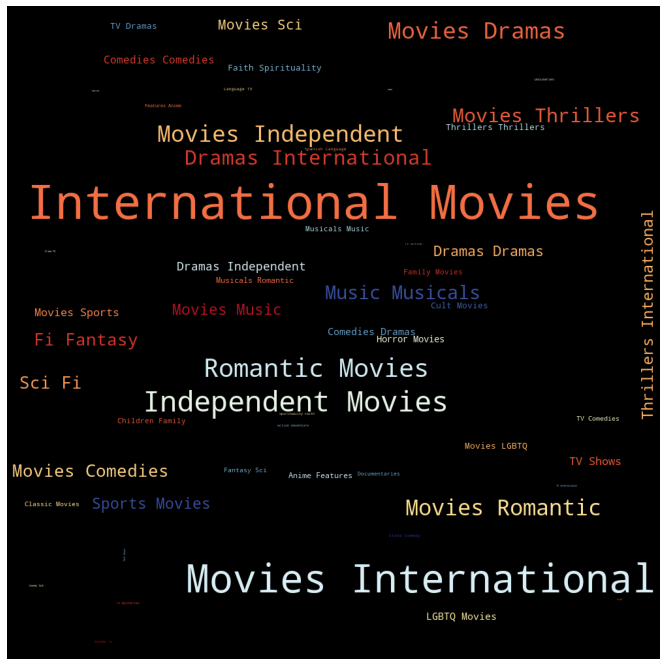

In [31]:
plt.rcParams['figure.figsize'] = (12,12)
text = ' '.join(splited_genres_df['value'])
wordcloud = WordCloud(colormap='RdYlBu', width = 1000,  height = 1000, max_words = 100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Top Countries**

In [32]:
country_df=df[['countries','type']]
country_df

,countries,type
1,Mexico,Movie
2,Singapore,Movie
3,United States,Movie
4,United States,Movie
5,Turkey,TV Show
...,...,...
7778,United States,Movie
7780,India,Movie
7781,United States,Movie
7782,"Sweden, Czech Republic, United Kingdom, Denmar...",Movie


Splitting the comma separated "countries" column values into different columns:

In [33]:
new_country_df=country_df['countries'].str.split(',', expand=True)
new_country_df

,0,1,2,3,4,5,6,7
1,Mexico,None,None,None,None,None,None,None
2,Singapore,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None
4,United States,None,None,None,None,None,None,None
5,Turkey,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
7778,United States,None,None,None,None,None,None,None
7780,India,None,None,None,None,None,None,None
7781,United States,None,None,None,None,None,None,None
7782,Sweden,Czech Republic,United Kingdom,Denmark,Netherlands,None,None,None


Concatinating the split countries columns:

In [34]:
splited_country_df=pd.concat([country_df, new_country_df], axis=1)
splited_country_df.drop(columns=['countries'], inplace=True)
value=list(splited_country_df.columns[1:])
splited_country_df=pd.melt(splited_country_df, id_vars=['type'], value_vars=value)
splited_country_df['value']=splited_country_df['value'].str.strip()
splited_country_df

,type,variable,value
0,Movie,0,Mexico
1,Movie,0,Singapore
2,Movie,0,United States
3,Movie,0,United States
4,TV Show,0,Turkey
...,...,...,...
39827,Movie,7,None
39828,Movie,7,None
39829,Movie,7,None
39830,Movie,7,None


Checking for missing values in the new "countries" data frame created:

In [35]:
print('null value\n', splited_country_df.isnull().sum(axis=0), '\n')
print('NaN value\n', splited_country_df.isna().sum(axis=0), '\n')
print(splited_country_df.shape, '\n')

null value
 type            0
variable        0
value       33519
dtype: int64 

NaN value
 type            0
variable        0
value       33519
dtype: int64 

(39832, 3) 



Handling the missing values in "countries" data frame:

In [36]:
splited_country_df.dropna(inplace=True)
print('null value\n', splited_country_df.isnull().sum(axis=0), '\n')
print('NaN value\n', splited_country_df.isna().sum(axis=0), '\n')
print(splited_country_df.shape, '\n')
splited_country_df

null value
 type        0
variable    0
value       0
dtype: int64 

NaN value
 type        0
variable    0
value       0
dtype: int64 

(6313, 3) 



,type,variable,value
0,Movie,0,Mexico
1,Movie,0,Singapore
2,Movie,0,United States
3,Movie,0,United States
4,TV Show,0,Turkey
...,...,...,...
33853,Movie,6,India
33897,Movie,6,United States
34239,Movie,6,United Kingdom
34321,Movie,6,Germany


In [37]:
country_df=pd.pivot_table(splited_country_df, values='variable', index='value', columns='type', aggfunc=len)
print('null value\n', country_df.reset_index().isnull().sum(axis=0), '\n')
print('NaN value\n', country_df.reset_index().isna().sum(axis=0), '\n')
print(country_df.shape, '\n')
country_df

null value
 type
value       0
Movie       0
TV Show    73
dtype: int64 

NaN value
 type
value       0
Movie       0
TV Show    73
dtype: int64 

(104, 2) 



type,Movie,TV Show
value,,
,2.0,NaN
Afghanistan,1.0,NaN
Albania,1.0,NaN
Algeria,2.0,NaN
Angola,1.0,NaN
...,...,...
Vatican City,1.0,NaN
Venezuela,1.0,NaN
Vietnam,5.0,NaN


In [38]:
country_df.replace(to_replace=np.nan, value=0, inplace=True)
print('null value\n', country_df.reset_index().isnull().sum(axis=0), '\n')
print('NaN value\n', country_df.reset_index().isna().sum(axis=0), '\n')
print(country_df.shape, '\n')
country_df

null value
 type
value      0
Movie      0
TV Show    0
dtype: int64 

NaN value
 type
value      0
Movie      0
TV Show    0
dtype: int64 

(104, 2) 



type,Movie,TV Show
value,,
,2.0,0.0
Afghanistan,1.0,0.0
Albania,1.0,0.0
Algeria,2.0,0.0
Angola,1.0,0.0
...,...,...
Vatican City,1.0,0.0
Venezuela,1.0,0.0
Vietnam,5.0,0.0


In [39]:
country_df['Total']=country_df['Movie']+country_df['TV Show']
country_df.sort_values(by='Total', ascending=False, inplace=True)
country_df

type,Movie,TV Show,Total
value,,,
United States,2303.0,48.0,2351.0
India,885.0,6.0,891.0
United Kingdom,403.0,23.0,426.0
Canada,255.0,8.0,263.0
France,248.0,6.0,254.0
...,...,...,...
Namibia,1.0,0.0,1.0
Nicaragua,1.0,0.0,1.0
Panama,1.0,0.0,1.0


Generating country code based on country name:

In [40]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
country_df['CODE']=alpha3code(country_df.index)
country_df.head(20)

type,Movie,TV Show,Total,CODE
value,,,,
United States,2303.0,48.0,2351.0,USA
India,885.0,6.0,891.0,IND
United Kingdom,403.0,23.0,426.0,GBR
Canada,255.0,8.0,263.0,CAN
France,248.0,6.0,254.0,FRA
Spain,138.0,9.0,147.0,ESP
Germany,141.0,2.0,143.0,DEU
Japan,97.0,11.0,108.0,JPN
China,96.0,2.0,98.0,CHN


In [41]:
print('null value\n', country_df.reset_index().isnull().sum(axis=0), '\n')
print('NaN value\n', country_df.reset_index().isna().sum(axis=0), '\n')
print(country_df.shape, '\n')

null value
 type
value      0
Movie      0
TV Show    0
Total      0
CODE       0
dtype: int64 

NaN value
 type
value      0
Movie      0
TV Show    0
Total      0
CODE       0
dtype: int64 

(104, 4) 



In [42]:
top_10 = country_df[:10]
top_10

type,Movie,TV Show,Total,CODE
value,,,,
United States,2303.0,48.0,2351.0,USA
India,885.0,6.0,891.0,IND
United Kingdom,403.0,23.0,426.0,GBR
Canada,255.0,8.0,263.0,CAN
France,248.0,6.0,254.0,FRA
Spain,138.0,9.0,147.0,ESP
Germany,141.0,2.0,143.0,DEU
Japan,97.0,11.0,108.0,JPN
China,96.0,2.0,98.0,CHN


Text(0.5, 1.0, 'Top 10 countries on Netflix')

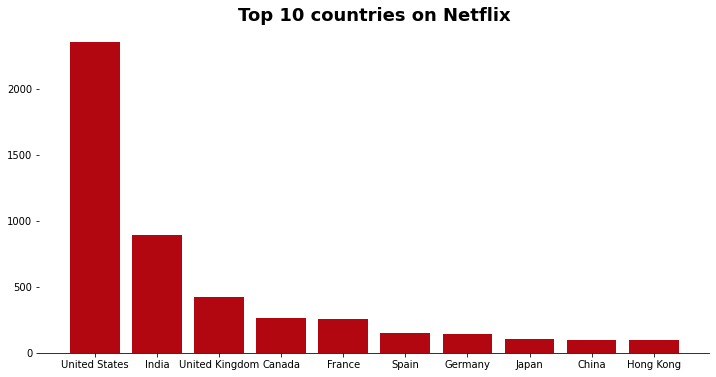

In [43]:
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(top_10.index, top_10['Total'],color='#b20710')

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
ax.set_title('Top 10 countries on Netflix', fontsize=18, fontweight='bold')

Clearly, the United States, India, and the United Kingdom have a high percentage of content.

We can also express it on the map as follows:

In [44]:
fig = px.choropleth(country_df, locations=country_df.index, 
                    color=country_df['Total'],
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Reds
                   )

fig.update_layout(title='Comparison by country', font=dict(size=18))
fig.show()
